# Validated integration of ODEs

In [5]:
using TaylorModels, TaylorSeries, IntervalArithmetic, TaylorIntegration, Plots
gr()

Plots.GRBackend()

In [6]:
# ODE
ode_eq(t, x) = x^2

# Exact solution
exactsolution(t, x0) = one(x0)/(inv(x0)-t)

exactsolution (generic function with 1 method)

In [7]:
# parameters for the ...
const abs_tolerance = 1.0e-8        # absolute tolerance for t
const orderT = 3                    # order in t
const orderX = 2
const max_orderX = 2*(orderX+1)
set_variables("δ", numvars=1, order = max_orderX);

In [8]:
# parameters for initial conditions

t0 = 0..0

x00 = 1..1
bx0 = IntervalBox(x00,)
δbx0 = bx0 + IntervalBox(-0.05 .. 0.05,) #X_0

# Independent and dependent variables for the integration
tT1 = t0 + Taylor1(orderT) # time (Taylor{Interval{Float64}})

# Initial condition for jet transport
x0 = x00 + TaylorN(1, order=orderX)      # Initial condition 1 + δ

# Dependent (Taylor1{TMNAbsRem{...}}) variables
xTm0 = TaylorModelN(x0, 0..0, bx0, δbx0)
xT1Tm = Taylor1(copy(xTm0), orderT)      # Taylor1(TMNAbsRem{...})

  [1, 1] + [1, 1] δ₁ + [0, 0] + 𝒪(t⁴)

In [2]:
time_end = (1/xTm0)*(δbx0-bx0)

UndefVarError: UndefVarError: xTm0 not defined

In [ ]:
1/xTm0

# TaylorModels example

In [15]:
using TaylorModels, IntervalArithmetic

In [16]:
using Plots; gr()

Plots.GRBackend()

In [23]:
t = TaylorModel1(2,0,-0.5..0.5)

 1 t + [0, 0]

In [25]:
f(x) = exp(x)

f (generic function with 1 method)

In [33]:
a = -0.5..0.5 # domain
x0 = mid(a)   # expansion point
t = TaylorModel1(1, interval(x0), a) #independent variable for Taylor Models order 2

ftm2 = f(t)

 [1, 1] + [1, 1] t + [-0, 0.148722]

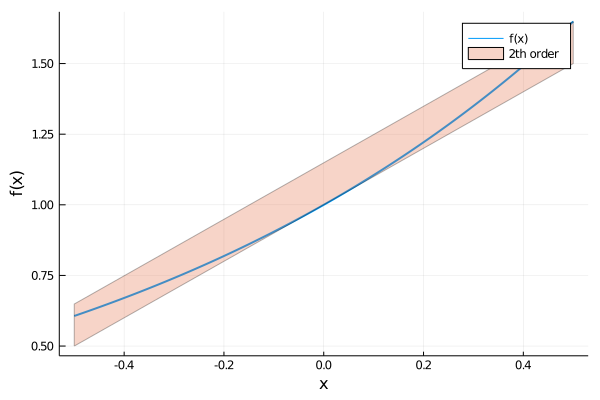

In [34]:
plot(range(inf(a), stop=sup(a), length=1000), x->f(x), label="f(x)", lw=2, xaxis="x", yaxis="f(x)")
plot!(ftm2, label="2th order")
#plot!(ftm7, label="7th order")

In [20]:
using TaylorSeries

In [19]:
import Pkg; Pkg.add("TaylorSeries")

  Resolving package versions...
   Updating `~/.julia/environments/v1.4/Project.toml`
  [6aa5eb33] + TaylorSeries v0.10.8
   Updating `~/.julia/environments/v1.4/Manifest.toml`
 [no changes]


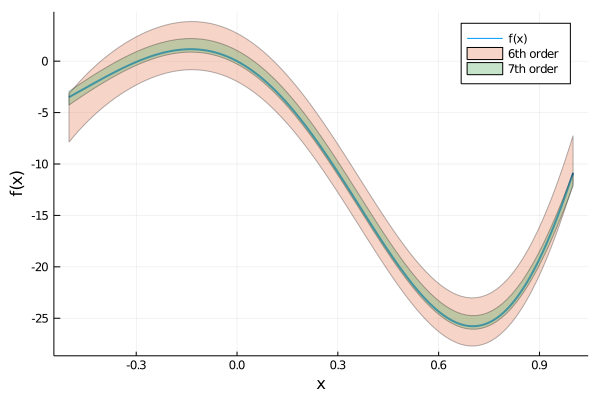

In [22]:
using TaylorModels

f(x) = x*(x-1.1)*(x+2)*(x+2.2)*(x+2.5)*(x+3)*sin(1.7*x+0.5)
a =  -0.5 .. 1.0 # Domain 
x0 = mid(a)     # Expansion point
tm6 = TaylorModel1(6, interval(x0), a) # Independent variable for Taylor models, order 6
tm7 = TaylorModel1(7, interval(x0), a)  # Independent variable for Taylor models, order 7
# Taylor models corresponding to f(x) of order 6 and 7
ftm6 = f(tm6)
ftm7 = f(tm7)

# Now the plot
using Plots; gr()
plot(range(inf(a), stop=sup(a), length=1000), x->f(x), label="f(x)", lw=2, xaxis="x", yaxis="f(x)")
plot!(ftm6, label="6th order")
plot!(ftm7, label="7th order")

# SIR in Julia

https://github.com/epirecipes/sir-julia/blob/master/markdown/ode/ode.md

In [38]:
using DifferentialEquations
#using SimpleDiffEq
#using DataFrames
#using DataFrames
#using StatsPlots


In [46]:
function sir_ode!(du,u,p,t)
    (S,I,R) = u
    (β,c,γ) = p
    N = S+I+R
    @inbounds begin
        du[1] = -β*c*I/N*S
        du[2] = β*c*I/N*S - γ*I
        du[3] = γ*I
    end
    nothing
end;

In [47]:
# Time domain
δt = 0.1
tmax = 40.0
tspan = (0.0,tmax)
t = 0.0:δt:tmax;

In [48]:
# Initial conditions
u0 = [990.0,10.0,0.0]; # S,I.R

In [51]:
# Parameter values
p = [0.07,10.0,0.25]; # β,c,γ

In [52]:
# running the model
prob_ode = ODEProblem(sir_ode!,u0,tspan,p)
sol_ode = solve(prob_ode);


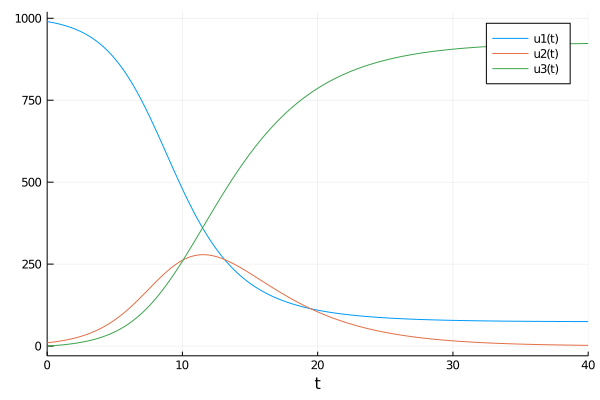

In [53]:
plot(sol_ode)

In [ ]:
# postprocessing (converting to dataframe for convenience)
df_ode = DataFrame(sol_ode(t)')
df_ode[!,:t] = t;

In [ ]:
#Plotting
@df df_ode plot(:t,
    [:x1 :x2 :x3],
    label=["S" "I" "R"],
    xlabel="Time",
    ylabel="Number")